In [63]:
import pandas as pd
import pathlib

In [64]:
rubygems = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/rubygems/*.csv")])

In [65]:
versions = pd.concat([pd.read_csv(f, index_col="id", dtype={"metadata": str, "licenses": str, "requirements": str, "cert_chain": str}) for f in pathlib.Path('.').glob("tables/versions/*.csv")])

In [66]:
attestations = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/attestations/*.csv")])

In [67]:
gem_downloads = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/gem_downloads/*.csv")])

In [68]:
dependencies = pd.concat([pd.read_csv(f, index_col="id", dtype={"unresolved_name": str}) for f in pathlib.Path('.').glob("tables/dependencies/*.csv")])

<Axes: xlabel='day_pushed'>

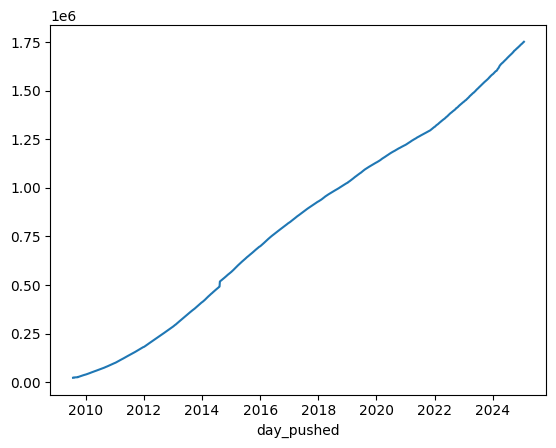

In [69]:
vs = versions.sort_values("created_at", ascending=True)
vs['day_pushed'] = pd.to_datetime(vs['created_at'], format='ISO8601').dt.date
vs.groupby("day_pushed")['full_name'].count().cumsum().plot()

<Axes: xlabel='day_pushed'>

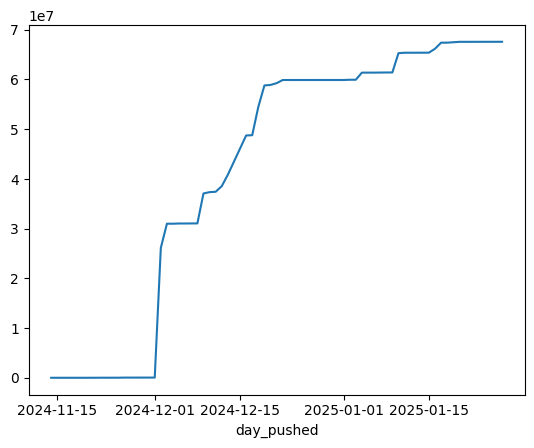

In [70]:
attestations.join(vs, how="inner", on='version_id', rsuffix="_version").join(gem_downloads.set_index('version_id'), how="inner", on='version_id', rsuffix="_gem_downloads").sort_values("day_pushed", ascending=True).groupby("day_pushed")['count'].sum().cumsum().plot()

In [71]:
attestations.join(vs, how="inner", on='version_id', rsuffix="_version").join(gem_downloads.set_index('version_id'), how="inner", on='version_id', rsuffix="_gem_downloads").sort_values(by=["count"], ascending=False)[['full_name', 'created_at', 'count']].head(25)

,full_name,created_at,count
id,,,
51,webrick-1.9.1,2024-12-02 05:48:56.957451,7482637
56,net-http-0.6.0,2024-12-02 08:42:35.836453,6739661
80,faraday-2.12.2,2024-12-09 10:52:08.369295,5619291
54,date-3.4.1,2024-12-02 07:51:28.89031,5439996
160,logger-1.6.4,2024-12-19 04:16:54.997126,4283920
65,io-console-0.8.0,2024-12-03 05:05:44.470755,4257092
237,logger-1.6.5,2025-01-10 06:05:46.433497,3879697
137,securerandom-0.4.1,2024-12-16 05:43:29.94218,3652521
135,timeout-0.4.3,2024-12-16 03:53:44.804142,3259231


In [72]:
ds = dependencies.join(rubygems['name'], how="inner", on='rubygem_id', rsuffix="_rubygems")
ds['dep_name'] = ds['name']
ds.join(vs[['full_name', 'day_pushed']], how="inner", on='version_id', rsuffix="_versions")


,requirements,created_at,updated_at,rubygem_id,version_id,scope,unresolved_name,name,dep_name,full_name,day_pushed
id,,,,,,,,,,,
10000000,~> 0.1,2024-03-17 16:02:21.86403,2024-03-17 16:02:21.86403,219800.0,1704928.0,runtime,NaN,isogametism_strangles,isogametism_strangles,conjunctivitis_enhydritic-0.1.7,2024-03-17
10000001,~> 0.1,2024-03-17 16:02:21.874907,2024-03-17 16:02:21.874907,219801.0,1704928.0,runtime,NaN,manageless_unhardihood,manageless_unhardihood,conjunctivitis_enhydritic-0.1.7,2024-03-17
10000002,~> 0.1,2024-03-17 16:02:21.885453,2024-03-17 16:02:21.885453,219717.0,1704928.0,runtime,NaN,scleronychia_conyrine,scleronychia_conyrine,conjunctivitis_enhydritic-0.1.7,2024-03-17
10000003,~> 0.1,2024-03-17 16:02:21.895961,2024-03-17 16:02:21.895961,219718.0,1704928.0,runtime,NaN,marasca_snobbishly,marasca_snobbishly,conjunctivitis_enhydritic-0.1.7,2024-03-17
10000004,~> 0.1,2024-03-17 16:02:21.909163,2024-03-17 16:02:21.909163,219719.0,1704928.0,runtime,NaN,whipping_juramental,whipping_juramental,conjunctivitis_enhydritic-0.1.7,2024-03-17
...,...,...,...,...,...,...,...,...,...,...,...
12249995,~> 0.1,2024-04-05 18:30:13.557535,2024-04-05 18:30:13.557535,216715.0,1718973.0,runtime,NaN,jagger_typometry_test,jagger_typometry_test,tolypeutine_ampulliform-0.1.7,2024-04-05
12249996,~> 0.1,2024-04-05 18:30:13.56101,2024-04-05 18:30:13.56101,216716.0,1718973.0,runtime,NaN,jagger_unethic_test,jagger_unethic_test,tolypeutine_ampulliform-0.1.7,2024-04-05
12249997,~> 0.1,2024-04-05 18:30:13.564594,2024-04-05 18:30:13.564594,220699.0,1718973.0,runtime,NaN,polygamous_entrepas,polygamous_entrepas,tolypeutine_ampulliform-0.1.7,2024-04-05


In [73]:
latest_downloads_date = list(pathlib.Path('/Users/segiddins/total-downloads/daily-downloads').glob("dates/*.csv"))
latest_downloads_date.sort()
latest_downloads_date = pd.to_datetime(latest_downloads_date[-2].stem)
thirty_days_ago = latest_downloads_date - pd.Timedelta(days=30)

latest_downloads = pd.read_csv("/Users/segiddins/total-downloads/daily-downloads/dates/{}.csv".format(latest_downloads_date.strftime("%Y-%m-%d")), index_col="name")
latest_downloads['date'] = latest_downloads_date
thirty_days_ago_downloads = pd.read_csv("/Users/segiddins/total-downloads/daily-downloads/dates/{}.csv".format(thirty_days_ago.strftime("%Y-%m-%d")), index_col="name")
thirty_days_ago_downloads['date'] = thirty_days_ago

# latest_downloads.join(thirty_days_ago_downloads, how="inner", on="date", rsuffix="_30_days_ago")
thirty_days_downloads = latest_downloads['total_downloads'].combine(thirty_days_ago_downloads['total_downloads'], func=lambda x, y: x - y, fill_value=0)

Downloads in the last 30 days

In [74]:
print("{:,} downloads in the last 30 days (from {} to {})".format(thirty_days_downloads.sum(), thirty_days_ago, latest_downloads_date))

2,794,533,860 downloads in the last 30 days (from 2024-12-27 00:00:00 to 2025-01-26 00:00:00)


Gems with 1MM+ downloads in the last 30 days

In [75]:
print("{:,} gems with 1MM+ downloads in the last 30 days".format(thirty_days_downloads[lambda x: x > 1_000_000].count()))

thirty_days_downloads[lambda x: x > 1_000_000].sort_values(ascending=False).to_frame().to_csv("1MM_downloads.csv")


637 gems with 1MM+ downloads in the last 30 days


Distribution of downloads in the last 30 days

<Axes: xlabel='name'>

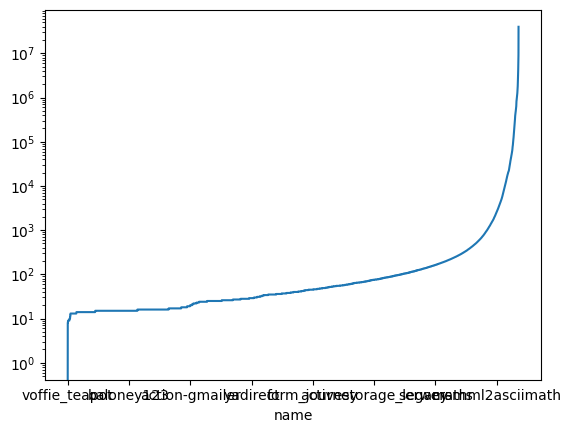

In [76]:
thirty_days_downloads.sort_values(ascending=True).plot(logy=True)


<Axes: title={'center': 'Distribution of downloads in the last 30 days'}, ylabel='name'>

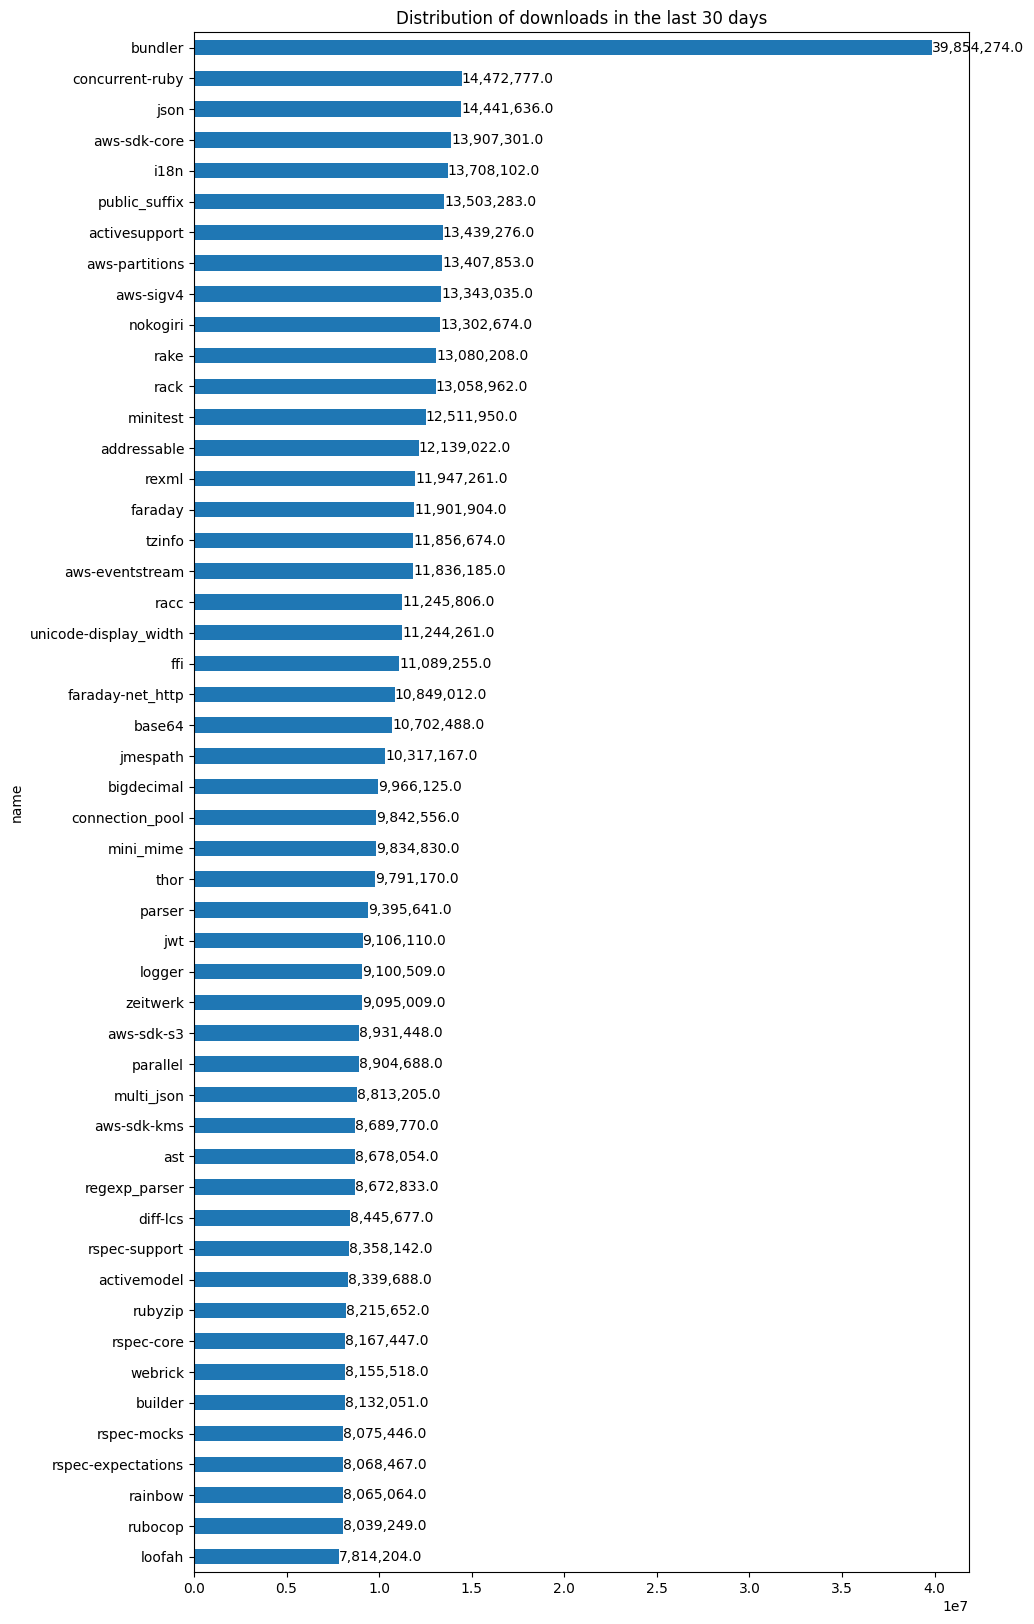

In [77]:
plt = thirty_days_downloads.sort_values(ascending=False).head(50).sort_values(ascending=True).plot(kind="barh", label="Downloads in the last 30 days", title="Distribution of downloads in the last 30 days", figsize=(10, 20))
plt.bar_label(plt.containers[0], fmt='{:,}')
plt

In [78]:
aws_downloads = thirty_days_downloads[thirty_days_downloads.index.str.startswith('aws-', na=False)].sum()
total_downloads = thirty_days_downloads.sum()
print("{:,} downloads from AWS gems in the last 30 days\n{:,} downloads from all gems in the last 30 days\nAWS gems account for {:,.2f}% of all downloads".format(aws_downloads, total_downloads, aws_downloads / total_downloads * 100))

276,166,202 downloads from AWS gems in the last 30 days
2,794,533,860 downloads from all gems in the last 30 days
AWS gems account for 9.88% of all downloads


In [83]:
f = thirty_days_downloads[lambda x: x > 1_000_000].sort_values(ascending=False).to_frame()

latest_release = vs.join(rubygems, how="left", on='rubygem_id', rsuffix="_rubygems").groupby('name')['created_at'].max().sort_values(ascending=False)
f['latest_release'] = [latest_release.loc[name] for name in f.index]
gems_with_attestation = attestations.join(vs, how="left", on='version_id', rsuffix="_versions").join(rubygems, how="left", on='rubygem_id', rsuffix="_rubygems")['name'].unique()
f['has_attestation'] = [name in gems_with_attestation for name in f.index]
f.to_csv("sigstore_adoption.csv")
f

,total_downloads,latest_release,has_attestation
name,,,
bundler,39854274,2025-01-16 17:10:41.004238,False
concurrent-ruby,14472777,2025-01-15 21:35:44.564414,False
json,14441636,2024-12-18 17:02:02.567268,False
aws-sdk-core,13907301,2025-01-24 20:10:27.782961,False
i18n,13708102,2025-01-19 22:49:28.777815,False
...,...,...,...
coverband,1016315,2024-10-19 21:35:40.161867,False
asciidoctor,1009665,2024-05-17 22:15:19.695336,False
licensee,1009004,2024-11-23 02:03:38.005576,False


In [84]:
f.groupby('has_attestation').count()

,total_downloads,latest_release
has_attestation,,
False,622,622
True,15,15


In [85]:
f.loc[f['has_attestation']]

,total_downloads,latest_release,has_attestation
name,,,
faraday,11901904,2024-12-09 10:52:08.36394,True
logger,9100509,2025-01-10 06:05:46.427535,True
webrick,8155518,2024-12-02 05:48:56.950356,True
net-imap,7174608,2025-01-04 04:58:22.230773,True
timeout,6870910,2024-12-16 03:53:44.782799,True
date,5856987,2024-12-02 07:52:07.43514,True
dotenv,5853385,2024-12-18 00:47:47.002887,True
net-http,4915674,2024-12-02 08:42:35.830388,True
securerandom,4180331,2024-12-16 05:43:29.935668,True


In [86]:
f.loc[f['latest_release'] < '2024-01-01'].sort_values(by='latest_release', ascending=True).head(50)


,total_downloads,latest_release,has_attestation
name,,,
colored,1415040,2010-02-10 18:16:23.759888,False
ruby-rc4,1338338,2012-02-07 17:41:25.818599,False
rack-accept,1155118,2012-06-15 15:38:20.495863,False
unicode_utils,2054614,2012-09-30 20:52:20.278513,False
chronic,1094592,2013-09-09 07:05:55.182409,False
orm_adapter,3045124,2013-11-12 16:19:42.605219,False
coercible,1477274,2013-12-10 11:06:41.571053,False
descendants_tracker,1505587,2014-03-27 05:23:55.780128,False
axiom-types,1437487,2014-03-27 06:29:33.554103,False
